# Titanic by Héctor

survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd sex Sex
Age Age in years
sibsp # of siblings / spouses aboard the Titanic
parch # of parents / children aboard the Titanic
ticket Ticket number
fare Passenger fare
cabin Cabin number
embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
mainpath = "C:/Users/Hector/Desktop/Competiciones Kaggle"
filenameTrain = "train.csv"
fullpathTrain = os.path.join(mainpath, filenameTrain)
train = pd.read_csv(fullpathTrain)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data = train.drop(['Ticket'], axis=1)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [8]:
NumCabin = data['Cabin'].isnull()


In [9]:
data['NumCabin']= NumCabin

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,NumCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,True


In [11]:
data = data.drop(['Cabin'], axis=1)

# Missing values 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  NumCabin     891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 70.6+ KB


Elimino las dos filas sin datos del embarked y relleno con el bvalor de la siguiente fila en la edad para que este bien distribuida

In [13]:
data['Age'] = data['Age'].fillna(method="ffill")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  NumCabin     891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 70.6+ KB


In [15]:
data = data.dropna(subset = ["Embarked"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  NumCabin     889 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 77.3+ KB


# One hot encoding

In [16]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [17]:
data = createDummies(data,"Sex")
data = createDummies(data,"Embarked")

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.535624,0.524184,0.382452,32.096681,0.350956,0.649044,0.188976,0.086614,0.724409
std,256.998173,0.486260,0.834700,14.527483,1.103705,0.806761,49.697504,0.477538,0.477538,0.391710,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualizaciones

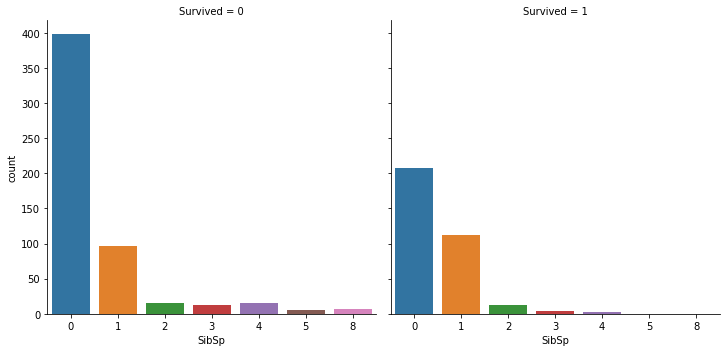

In [19]:
sns.catplot(x="SibSp", col='Survived', data= data, kind='count')
plt.show()

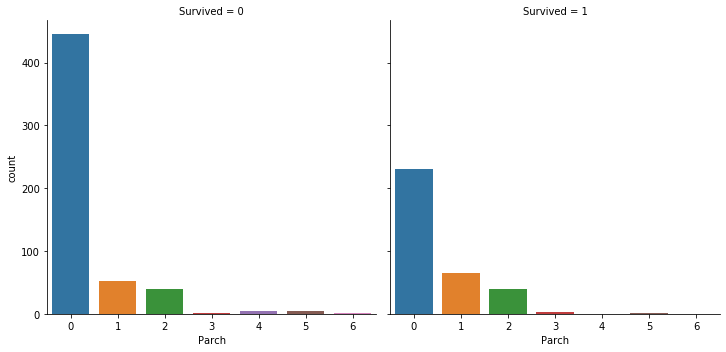

In [20]:
sns.catplot(x="Parch", col='Survived', data= data, kind='count')
plt.show()

Es importante la variable si va a acompañado o no, sobretodo en la diferencia que hay entre la primera columna y la segunda. Cuando va acompañado y cuando no, por lo que se puede crear una columna boleana que describa esto.

In [21]:
def acompañado(data):
    if (data['SibSp'] + data['Parch'] > 0):
        return 1
    else:
        return 0

In [22]:
data['acompañado'] = data.apply(acompañado, axis=1)

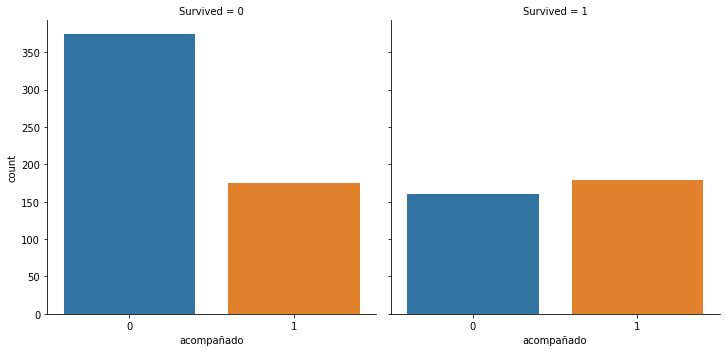

In [23]:
sns.catplot(x="acompañado", col='Survived', data=data, kind='count')

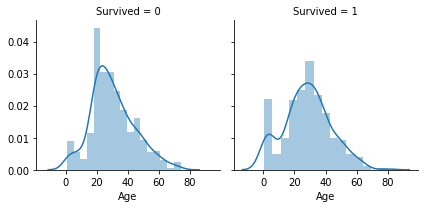

In [24]:
g= sns.FacetGrid(data, col='Survived')
g= g.map(sns.distplot,'Age')

Las edades no tienen mucha correlacion pero tienen dos picos, uno con los bebes y con la gente entre 35-40 años. También se ve por el contrario que las personas mayores de 60 practicamente todas mueren

# Data wrangling

Normalizar las variables numéricas

In [25]:
zscore = lambda x: (x - x.mean())/x.std()

In [26]:
data["Age"] = data["Age"].transform(zscore) 
data["Fare"] = data["Fare"].transform(zscore) 

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,NumCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,acompañado
0,1,0,3,"Braund, Mr. Owen Harris",-0.518715,1,0,-0.499958,True,0,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.582646,1,0,0.788503,False,1,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",-0.243375,0,0,-0.486376,True,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.376141,1,0,0.422623,False,1,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",0.376141,0,0,-0.483861,True,0,1,0,0,1,0


In [28]:
data = data.drop(["SibSp", "Parch","Name"],axis=1)

In [29]:
data.head()

,PassengerId,Survived,Pclass,Age,Fare,NumCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,acompañado
0,1,0,3,-0.518715,-0.499958,True,0,1,0,0,1,1
1,2,1,1,0.582646,0.788503,False,1,0,1,0,0,1
2,3,1,3,-0.243375,-0.486376,True,1,0,0,0,1,0
3,4,1,1,0.376141,0.422623,False,1,0,0,0,1,1
4,5,0,3,0.376141,-0.483861,True,0,1,0,0,1,0


# Aplicación de clústers

In [30]:
from sklearn.cluster import KMeans

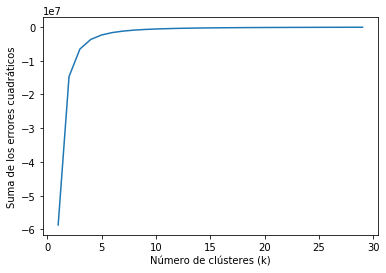

In [31]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

Elegimos 5 clusters porque a partir de este número no cambia el error practicamente

In [34]:
#%% Aplicamos y etiquetamos nuestro dataframe.
kmeans = KMeans(n_clusters=5).fit(data)
labels = kmeans.predict(data)
data['label'] = labels

In [36]:
data.head(500)

,PassengerId,Survived,Pclass,Age,Fare,NumCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,acompañado,label
0,1,0,3,-0.518715,-0.499958,True,0,1,0,0,1,1,2
1,2,1,1,0.582646,0.788503,False,1,0,1,0,0,1,2
2,3,1,3,-0.243375,-0.486376,True,1,0,0,0,1,0,2
3,4,1,1,0.376141,0.422623,False,1,0,0,0,1,1,2
4,5,0,3,0.376141,-0.483861,True,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,497,1,1,1.684006,0.929021,False,1,0,1,0,0,1,0
497,498,0,3,1.684006,-0.342003,True,0,1,0,0,1,0,0
498,499,0,1,-0.312210,2.403608,False,1,0,0,0,1,1,0
499,500,0,3,-0.381045,-0.488976,True,0,1,0,0,1,0,0


# Modelos de clasificación 

In [118]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [120]:
y = data.Survived
x = data.drop(['Survived','PassengerId'], axis=1)

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Clasificador random forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)
y_predicha= clf.predict(x_test)

In [123]:
# en el primer argumento hay que poner la etiqueta del test y la predicha para el test
metrics.accuracy_score(y_test, y_predicha)

0.8033707865168539

In [125]:
metrics.confusion_matrix(y_test, y_predicha)

array([[95, 17],
       [18, 48]], dtype=int64)

### Clasificador XGBoost

In [147]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

In [148]:
xgbClasificador = XGBClassifier()
xgbClasificador.fit(x_train, y_train)
y_predichaXGB=xgbClasificador.predict(x_test)

In [149]:
metrics.confusion_matrix(y_test, y_predichaXGB)

array([[92, 20],
       [15, 51]], dtype=int64)

In [150]:
metrics.accuracy_score(y_test, y_predichaXGB)

0.8033707865168539

In [152]:
scores = cross_val_score(xgbClasificador, x_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbClasificador, x_train, y_train, cv=kfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


Mean cross-validation score: 0.78
K-fold CV average score: 0.80


In [156]:
y_predichaXGB=xgbClasificador.predict(x_test)
metrics.accuracy_score(y_test, y_predichaXGB)

0.8033707865168539